In [1]:
import matplotlib.pyplot as plt
import pandas as pd

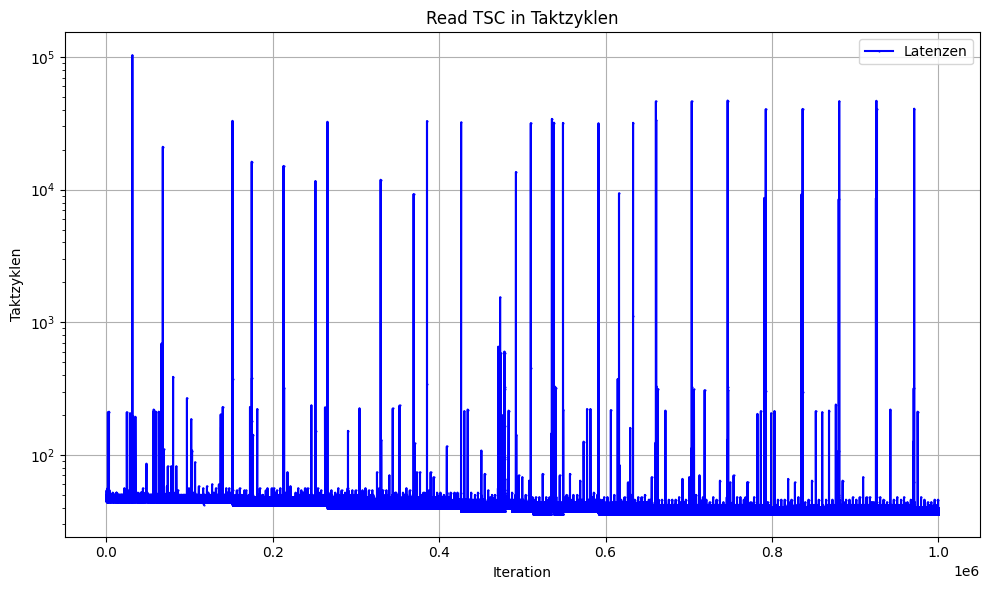

In [2]:
tsc = pd.read_csv('../resources/latencies_tsc.csv')

plt.figure(figsize=(10, 6))

plt.plot(tsc['Latenz_tz'], label="Latenzen", color='blue', linestyle='-', marker='.', markersize=1)

plt.title("Read TSC in Taktzyklen")
plt.xlabel("Iteration")
plt.ylabel("Taktzyklen")
plt.yscale('log')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig('tsc.png')
plt.show()

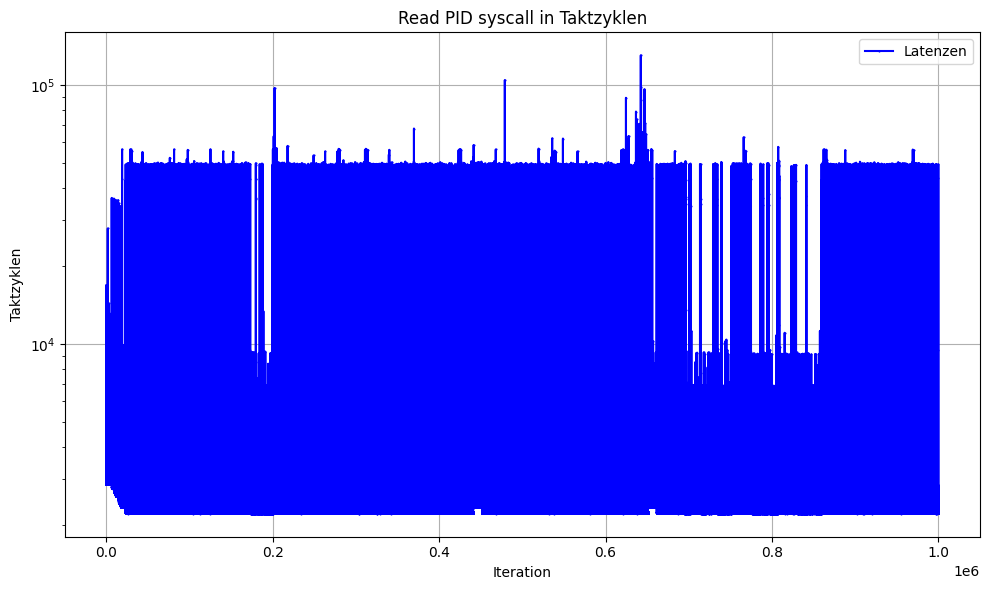

In [3]:
pid = pd.read_csv('../resources/latencies_pid.csv')

plt.figure(figsize=(10, 6))

plt.plot(pid['Latenz_tz'], label="Latenzen", color='blue', linestyle='-', marker='.', markersize=1)

plt.title("Read PID syscall in Taktzyklen")
plt.xlabel("Iteration")
plt.ylabel("Taktzyklen")
plt.yscale('log')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig('pid.png')
plt.show()

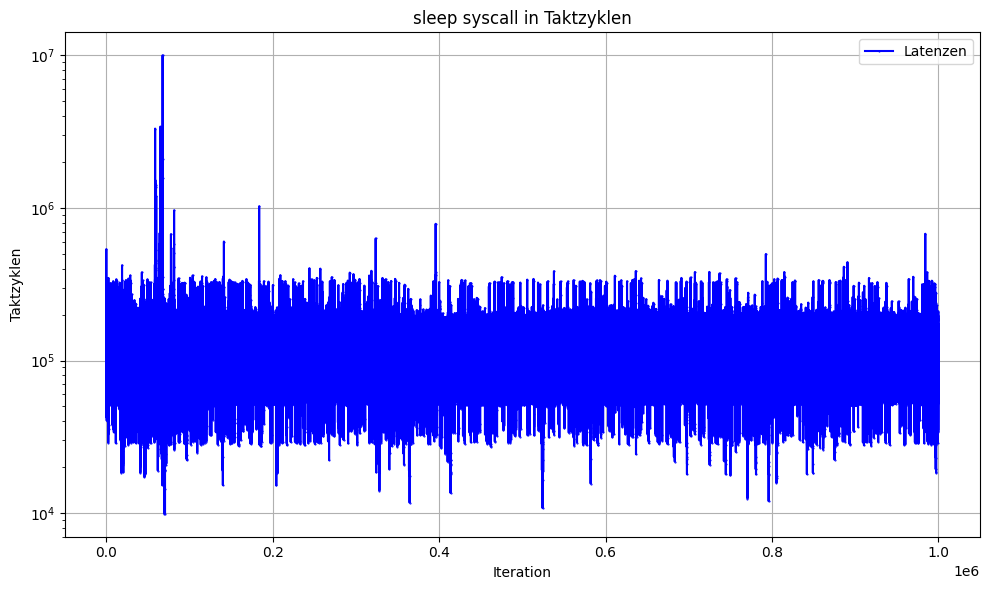

In [4]:
sleep = pd.read_csv('../resources/latencies_nanosleep.csv')

plt.figure(figsize=(10, 6))

plt.plot(sleep['Latenz_tz'], label="Latenzen", color='blue', linestyle='-', marker='.', markersize=1)

plt.title("sleep syscall in Taktzyklen")
plt.xlabel("Iteration")
plt.ylabel("Taktzyklen")
plt.yscale('log')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig('nanosleep.png')
plt.show()

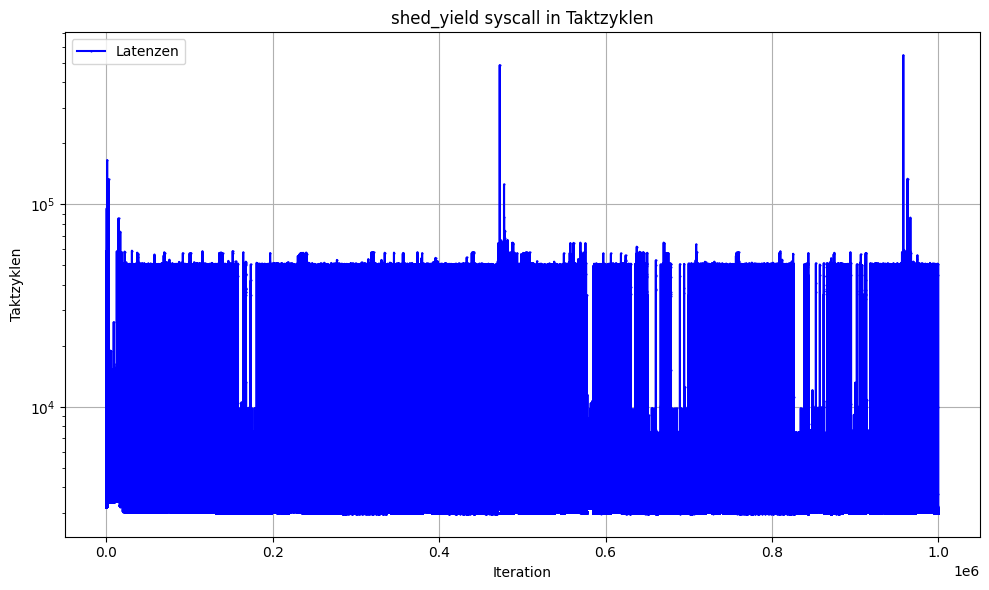

In [5]:
shed_yield = pd.read_csv('../resources/latencies_shed_yield.csv')

plt.figure(figsize=(10, 6))

plt.plot(shed_yield['Latenz_tz'], label="Latenzen", color='blue', linestyle='-', marker='.', markersize=1)

plt.title("shed_yield syscall in Taktzyklen")
plt.xlabel("Iteration")
plt.ylabel("Taktzyklen")
plt.yscale('log')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig('shed_yield.png')
plt.show()

In [6]:
# Prozessortaktfrequenz in GHz
prozessorschwindigkeit = 2.592005 


In [7]:
tsc_mean = tsc['Latenz_tz'].mean() 
tsc_min, tsc_max = tsc['Latenz_tz'].min(), tsc['Latenz_tz'].max()
f'TSC Taktzyklen: {tsc_mean:.2f}, {tsc_mean / prozessorschwindigkeit:.2f} ns Min: {tsc_min}, Max: {tsc_max}'

'TSC Taktzyklen: 42.31, 16.32 ns Min: 36, Max: 103188'

In [8]:
pid_mean = pid['Latenz_tz'].mean()
pid_min, pid_max = pid['Latenz_tz'].min(), pid['Latenz_tz'].max()
f'TSC Taktzyklen: {pid_mean:.2f}, {pid_mean / prozessorschwindigkeit:.2f} ns Min: {pid_min}, Max: {pid_max}'

'TSC Taktzyklen: 2362.00, 911.26 ns Min: 2202, Max: 130268'

In [9]:
sleep_mean = sleep['Latenz_tz'].mean()
sleep_min, sleep_max = sleep['Latenz_tz'].min(), sleep['Latenz_tz'].max()
f'TSC Taktzyklen: {sleep_mean:.2f}, {sleep_mean / prozessorschwindigkeit:.2f} ns Min: {sleep_min}, Max: {sleep_max}'

'TSC Taktzyklen: 162670.45, 62758.54 ns Min: 9890, Max: 10024418'

In [10]:
shed_yield_mean = shed_yield['Latenz_tz'].mean()
shed_yield_min, shed_yield_max = shed_yield['Latenz_tz'].min(), shed_yield['Latenz_tz'].max()
f'TSC Taktzyklen: {shed_yield_mean:.2f}, {shed_yield_mean / prozessorschwindigkeit:.2f} ns Min: {shed_yield_min}, Max: {shed_yield_max}'

'TSC Taktzyklen: 3216.38, 1240.89 ns Min: 2962, Max: 543972'